In [4]:
# import pandas as pd
# import numpy as np

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Step 1: Load the Data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Step 2: Preprocess the Data
X_train = train_data.drop('label', axis=1).values.astype('float32') / 255.0
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values.astype('float32') / 255.0
y_test = test_data['label'].values

# Reshape the data
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Step 3: Define the CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

# Step 7: Make Predictions (optional)
predictions = model.predict(X_test)


C:\Users\buoyn\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.6469 - loss: 0.9822 - val_accuracy: 0.8431 - val_loss: 0.4337
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.8284 - loss: 0.4738 - val_accuracy: 0.8693 - val_loss: 0.3628
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8574 - loss: 0.4009 - val_accuracy: 0.8778 - val_loss: 0.3313
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.8709 - loss: 0.3619 - val_accuracy: 0.8865 - val_loss: 0.3113
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8784 - loss: 0.3373 - val_accuracy: 0.8957 - val_loss: 0.2882
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8896 - loss: 0.3042 - val_accuracy: 0.9007 - val_loss: 0.2841
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.8956 - loss: 0.2862 - val_accuracy: 0.9011 - val_loss: 0.2752
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8987 - loss: 0.2794 - 

In [10]:
predicted_labels = np.argmax(predictions, axis=1)

# Display some sample predictions
for i in range(10):
    print("Predicted Label:", predicted_labels[i])

Predicted Label: 0
Predicted Label: 1
Predicted Label: 2
Predicted Label: 6
Predicted Label: 3
Predicted Label: 6
Predicted Label: 8
Predicted Label: 6
Predicted Label: 5
Predicted Label: 0


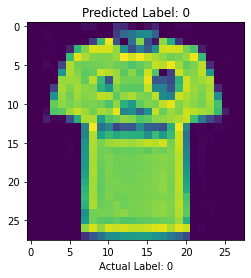

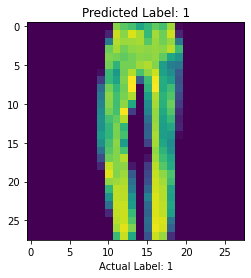

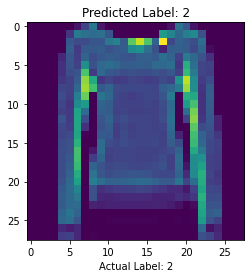

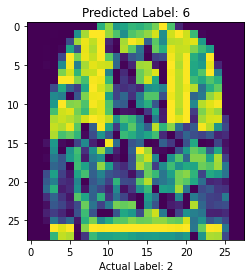

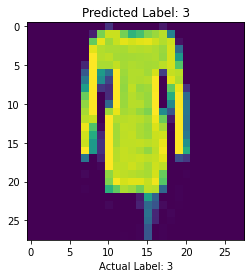

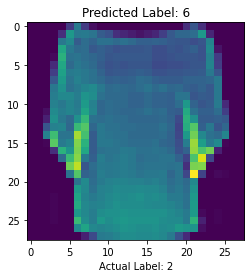

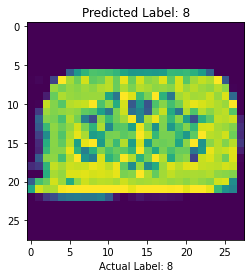

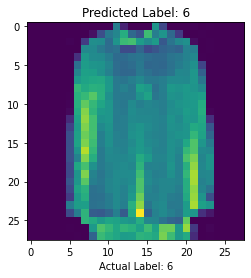

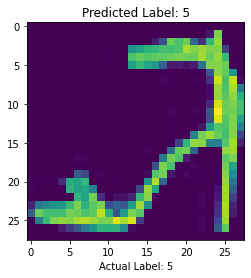

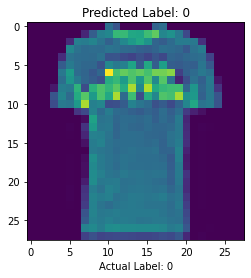

In [13]:
# predictions = model.predict(X_test)

# Convert predictions to labels
# predicted_labels = np.argmax(predictions, axis=1)

# Display some sample predictions
for i in range(10):
    # Display the image
    # plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f'Predicted Label: {predicted_labels[i]}')
    plt.xlabel(f'Actual Label: {np.argmax(y_test[i])}')
    # plt.xticks([])
    # plt.yticks([])
    plt.show()
